In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("smartcart_customers.csv")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

# Data Preprocessing

In [4]:
# Filling Income column's null value

df["Income"] = df["Income"].fillna(df["Income"].median())

# Feature Engineering

In [5]:
df.columns
df.head()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

In [6]:
# Creating new column Age using Year_Birth
df["Age"] = 2026-df["Year_Birth"]


In [7]:
# Creating new column Customer_Tenure_Days using max of Joining_Date

# Step1: Converting Joining_Date in Date format
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

# Step2: Deciding a reference data (max of Dt_Customer)
reference_date = df["Dt_Customer"].max()

# Final Step: Creating Customer_Tenure_Days
df["Customer_Tenure_Days"] = (reference_date - df["Dt_Customer"]).dt.days

In [8]:
# Creating Total_Spending (Sum of all spending)
df["Total_Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [9]:
# Total children
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [10]:
# Splitting Education in three categories (Undergraduate, PostGraduate, Graduate)
print(df["Education"].value_counts())

df["Education"] = df["Education"].replace({
    "Basic" : "Undergraduate",
    "2n Cycle" : "Undergraduate",
    "Master" : "Postgraduate",
    "PhD" : "Postgraduate",
    "Graduation" : "Graduate"
})

print(df["Education"].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64


In [11]:
# Handling Marital_Status
print(df["Marital_Status"].value_counts())

df["Living_With"] = df["Marital_Status"].replace({
    "Married": "Partner",
    "Together": "Partner",
    "Single": "Alone",
    "Widow": "Alone",
    "Absurd": "Alone",
    "YOLO": "Alone",
    "Divorced": "Alone",
    "Alone": "Alone"
})

print(df["Living_With"].value_counts())

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Living_With
Partner    1444
Alone       796
Name: count, dtype: int64


# Feature Extraction

In [12]:
# Droping Unnecessary columns
cols = ["ID", "Year_Birth", "Marital_Status", "Kidhome", "Teenhome", "Dt_Customer"]
spending_cols = ["MntFruits", "MntGoldProds", "MntSweetProducts", "MntWines", "MntFishProducts", "MntMeatProducts"]

cols_to_drop = cols + spending_cols

df_cleaned = df.drop(columns = cols_to_drop)

In [13]:
df_cleaned.columns
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


# Outlier Detection

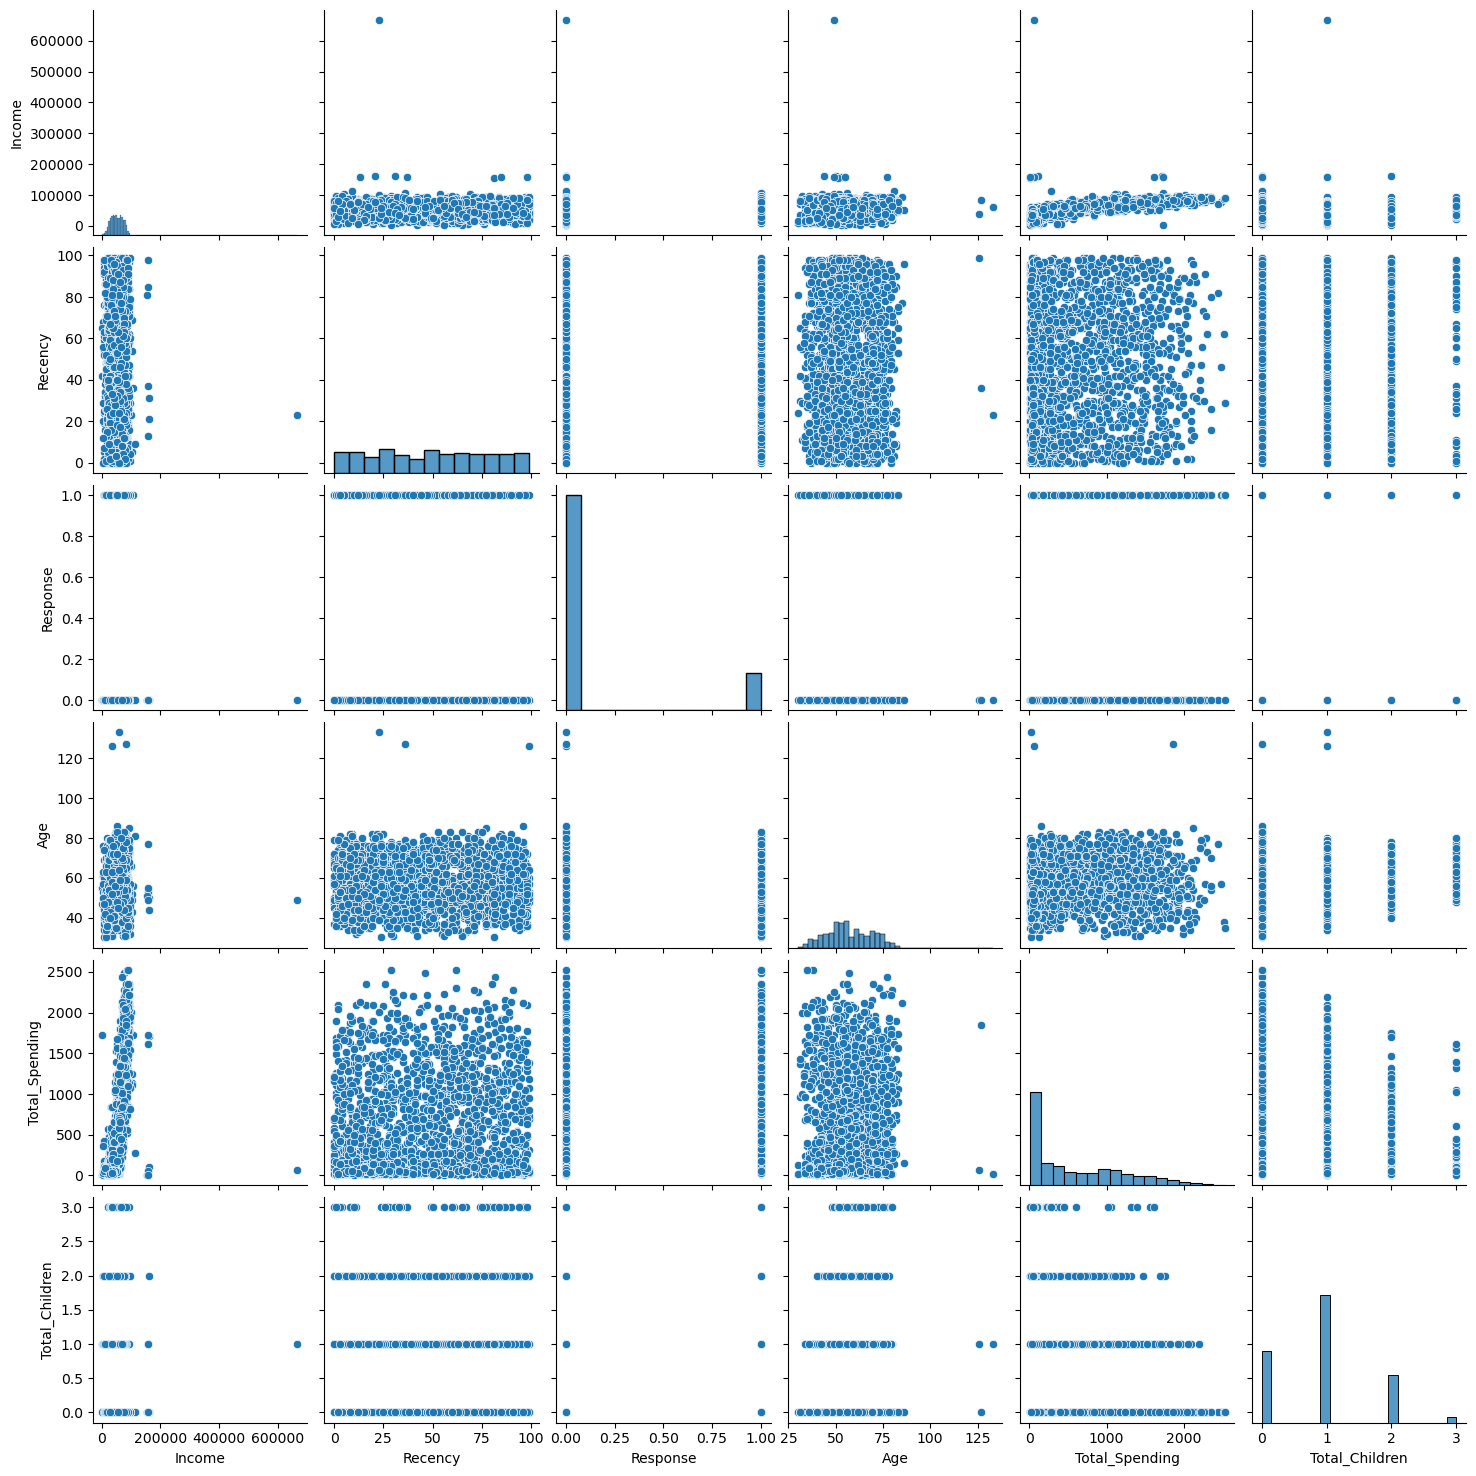

In [14]:
cols = ["Income", "Recency", "Response", "Age", "Total_Spending", "Total_Children"]

# Relative plots of some features- pair plots
sns.pairplot(df_cleaned[cols])

In [15]:
# Outliers Removal

print("Data size with outliers:", len(df_cleaned))

df_cleaned = df_cleaned[df_cleaned["Age"] < 90]
df_cleaned = df_cleaned[df_cleaned["Income"] < 600000]

print("Data size without outliers:", len(df_cleaned))


Data size with outliers: 2240
Data size without outliers: 2236


# Heatmap of Features

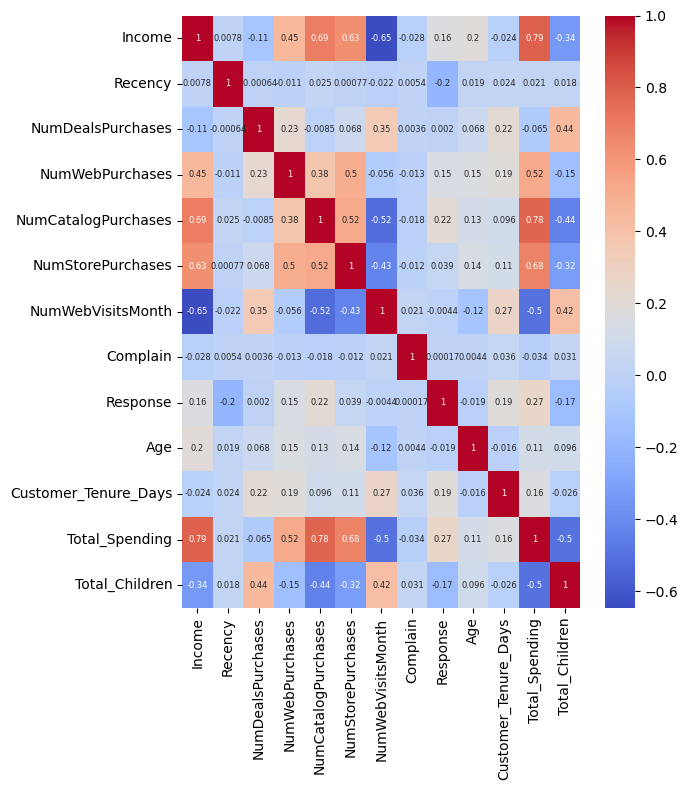

In [16]:
# Correlation matrix
corr = df_cleaned.corr(numeric_only=True)


plt.figure(figsize=(7,8))

sns.heatmap(
    corr,
    annot=True,
    annot_kws={"size": 6},
    cmap="coolwarm"
)

plt.tight_layout()

# Feature Encoding

In [17]:
from sklearn.preprocessing import OneHotEncoder

ohe =OneHotEncoder()

# Categorical columns to encode
cat_cols = ["Education", "Living_With"]

# Enconding
# IMP: No need of dropfirst True in Clustering cause may be that column add  meaningful info to cluster
enc_cols = ohe.fit_transform(df_cleaned[cat_cols])

# Converting enc_cols to DataFrame
enc_df = pd.DataFrame(enc_cols.toarray(), columns=ohe.get_feature_names_out(cat_cols), index=df_cleaned.index)

In [18]:
# Adding encoded cols and droping previous of that
df_encoded = pd.concat([df_cleaned.drop(columns=cat_cols), enc_df], axis=1)

In [19]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


# Feature Selection

In [20]:
 X = df_encoded

# Scaling / standardization of data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Visualizing Data

Text(0.5, 0.92, '3D Projection')

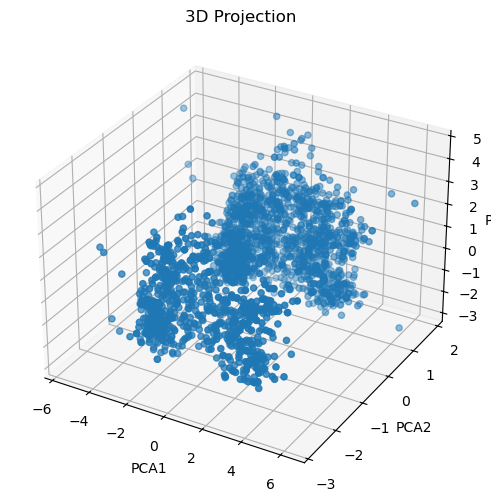

In [22]:
# 2D/3D Visualization

from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_pca = pca.fit_transform(X_scaled)


# plot

# 2D
# plt.scatter(
#     X_pca[:, 0],
#     X_pca[:, 1]
# )

#3D
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2]
)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D Projection")

In [23]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

# Comparing Algorithms 

## 1. Elbow Method

In [24]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)



In [25]:
# Optimal k
knee = KneeLocator(range(2,11), wcss, curve="convex", direction="decreasing")
optimal_k = knee.elbow
print("Best k:",optimal_k)

Best k: 5


Text(0, 0.5, 'WCSS')

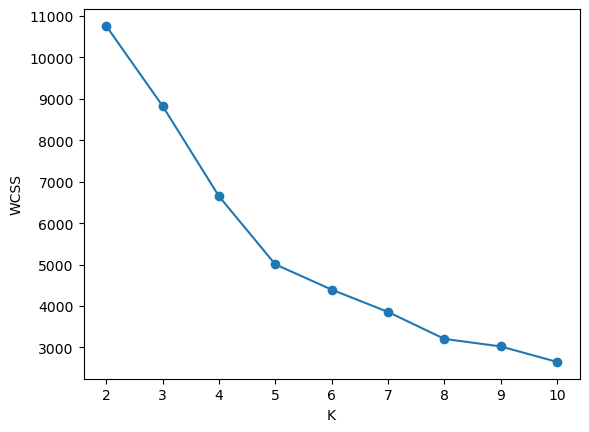

In [26]:
# Plot of Elbow

plt.plot(range(2, 11), wcss, marker="o")
plt.xlabel("K")
plt.ylabel("WCSS")

## 2. Silhouette Score

In [27]:
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores.append(score)

Text(0, 0.5, 'Silhouette Score')

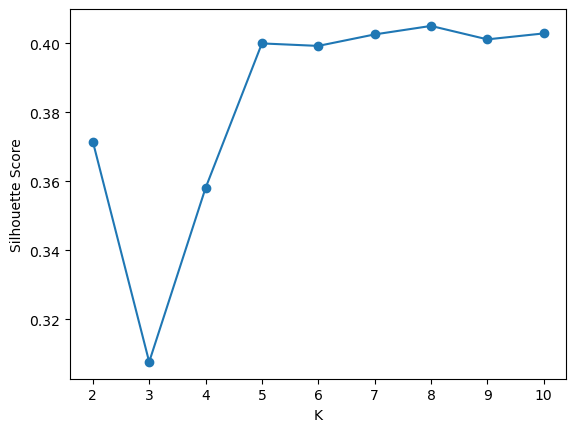

In [28]:
# Plot of Silhouette Score

plt.plot(range(2, 11), scores, marker="o")
plt.xlabel("K")
plt.ylabel("Silhouette Score")

Text(0, 0.5, 'Silhouette Score')

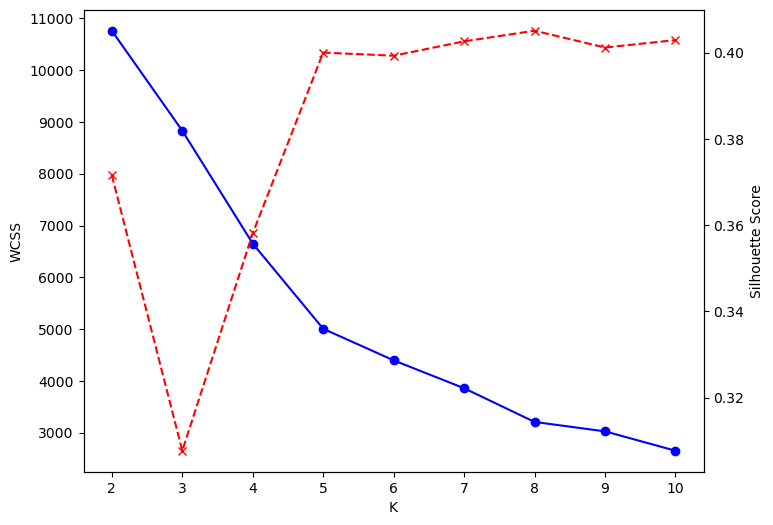

In [29]:
# Best k using both elbow and silhouette

k_range = range(2, 11)

fig, ax1 = plt.subplots(figsize=(8,6))

ax1.plot(k_range, wcss[:len(k_range)], marker="o", color="blue")
ax1.set_xlabel("K")
ax1.set_ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(k_range, scores[:len(k_range)], marker="x", color="red", linestyle="--")
ax2.set_ylabel("Silhouette Score")

In [30]:
print("Best K is 4")

Best K is 4


# Applying Clustering Algorithms

## 1. K-Means

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels_km = kmeans.fit_predict(X_pca)

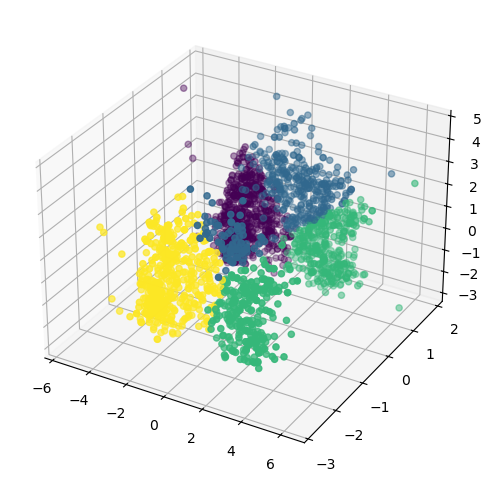

In [32]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_km)

## 2. Agglomerative Clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering

agg_clf = AgglomerativeClustering(n_clusters=4, linkage="ward")

labels_agg = agg_clf.fit_predict(X_pca)

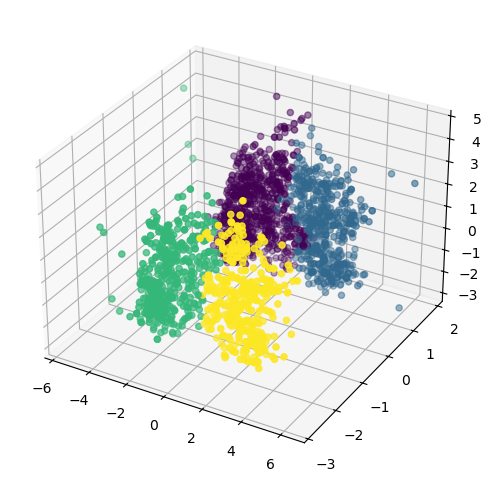

In [34]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_agg)

In [35]:
print("Agglomerative is performing much better on k = 4")

print("Selecting Agglomerative Clustring as best Clustring Algorithm for this data set.")

Agglomerative is performing much better on k = 4
Selecting Agglomerative Clustring as best Clustring Algorithm for this data set.


DBSCAN is not good for this type of data cause there are 36 types of customers.
In DBSCAN we can't give value of k before clustering, so DBSCAN gives 36 clusters.

# Characterization/ Analysis/ Profiling of the Clusters

In [36]:
# Characterisation with cleaned data (df_cleaned)

# Adding labels_agg as labels
X["cluster"] = labels_agg

X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,cluster
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='cluster', ylabel='count'>

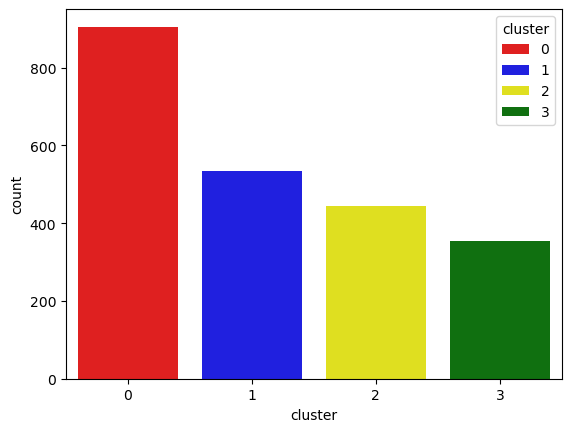

In [37]:
# Ploting Cluster/labels wise cumstomers

clr_plt = ["red", "blue", "yellow", "green"]

sns.countplot(
    x=X["cluster"],
    palette=clr_plt,
    hue=X["cluster"]
)

<Axes: xlabel='Total_Spending', ylabel='Income'>

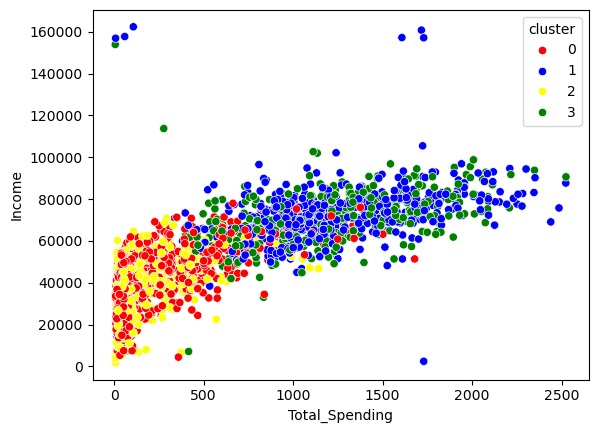

In [39]:
# CHECKING  Income & Spending pattern useing plot

sns.scatterplot(x=X["Total_Spending"], y=X["Income"], hue=X["cluster"], palette=clr_plt)

# Cluster Summary

In [40]:
cluster_summary = X.groupby("cluster").mean()

cluster_summary

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
cluster,,,,,,,,,,,,,,,,,,
0,39680.580110,48.914917,2.594475,3.153591,0.969061,4.143646,6.307182,0.011050,0.076243,55.669613,342.939227,221.955801,1.243094,0.514917,0.338122,0.146961,0.000000,1.000000
1,72808.445693,49.202247,1.958801,5.687266,5.498127,8.659176,3.580524,0.005618,0.166667,59.492509,369.720974,1236.588015,0.511236,0.471910,0.455056,0.073034,0.000000,1.000000
2,36960.143018,48.319820,2.594595,2.713964,0.837838,3.623874,6.659910,0.011261,0.141892,55.691441,338.781532,165.702703,1.272523,0.488739,0.378378,0.132883,0.993243,0.006757
3,70722.681303,50.504249,1.855524,5.790368,5.014164,8.430595,3.728045,0.005666,0.320113,58.932011,376.280453,1190.385269,0.461756,0.541076,0.390935,0.067989,1.000000,0.000000
